### Banking Inferences

Problem Statement:

-> Bank Of New York wants to expand its branches and for that it has certain hypothesis and statements it wants to verify. Using the inferential statistics method you just learned, help the bank.

Why solve this project ?

-> After completing this project, you will have a better understanding of how to use inferential statistics. In this project, you will apply the following concepts:

- Confidence Interval

- Central Limit Theorem

- Hypothesis Testing

- Chi Square Test

##### Confidence Interval

- A Confidence interval is a range of values that likely would contain an unknown population parameter.
- Margin of error, also called confidence interval, tells you how much you can expect your survey results to reflect the views from the overall population.

In [3]:
path

In [7]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import warnings

warnings.filterwarnings('ignore')
#Sample_Size
sample_size=2000

#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)  

# path        [File location variable]

#Code starts here

#Reading file
data=pd.read_csv(path)
print(data.head())
#Sampling the dataframe
data_sample = data.sample(n=sample_size, random_state=0)


#Finding the mean of the sample
sample_mean = data_sample['installment'].mean()

#Finding the standard deviation of the sample
sample_std = data_sample['installment'].std()

#Finding the margin of error
margin_of_error = z_critical * (sample_std/math.sqrt(sample_size))

#Finding the confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
print()
print("Confidence interval:")
print(confidence_interval)

#Finding the true mean
true_mean=data['installment'].mean()

print(("True mean: {}".format(true_mean)))

#Code ends here

  customer.id credit.policy             purpose int.rate  installment  \
0       LA001           Yes  debt_consolidation   11.89%       829.10   
1       LA002           Yes         credit_card   10.71%       228.22   
2       LA003           Yes  debt_consolidation   13.57%       366.86   
3       LA004           Yes  debt_consolidation   10.08%       162.34   
4       LA005           Yes         credit_card   14.26%       102.92   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0       11.350407  19.48   737        5639.958333      28854        52.1   
1       11.082143  14.29   707        2760.000000      33623        76.7   
2       10.373491  11.63   682        4710.000000       3511        25.6   
3       11.350407   8.10   712        2699.958333      33667        73.2   
4       11.299732  14.97   667        4066.000000       4740        39.5   

   pub.rec inq.last.6mths delinq.2yrs paid.back.loan  
0        0    Less than 5          No            

##### CLT : Central Limit Theorem

The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution.

Let's now find out if Central Limit Theorem holds for installment column

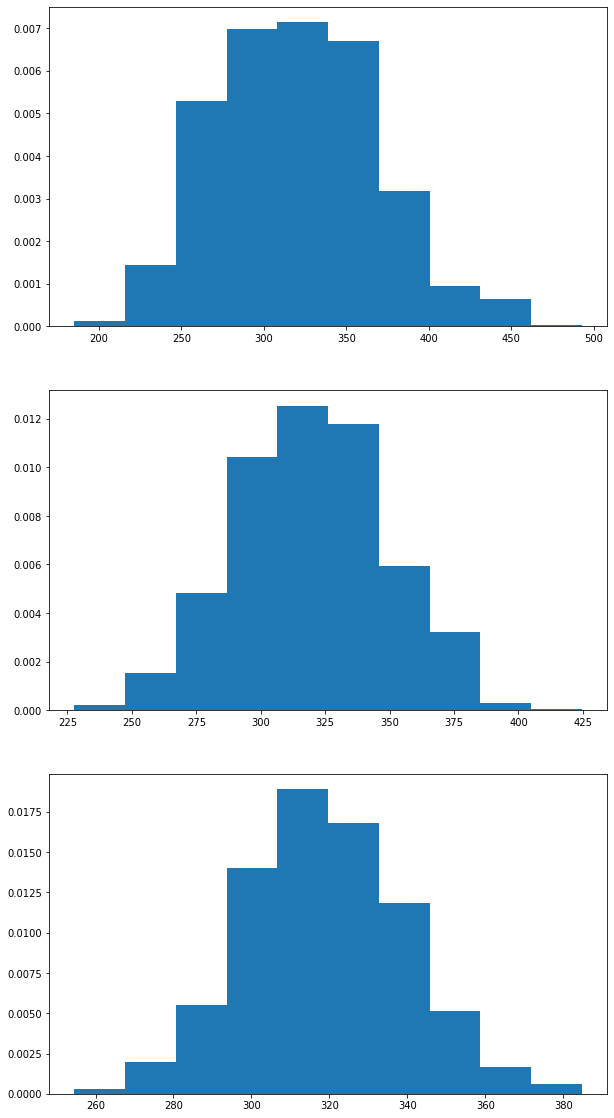

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#Different sample sizes to take
sample_size=np.array([20,50,100])

#Code starts here

#Creating different subplots
fig,axes=plt.subplots(3,1, figsize=(10,20))

#Running loop to iterate through rows
for i in range(len(sample_size)):
    
    #Initialising a list
    m=[]
    
    #Loop to implement the no. of samples
    for j in range(1000):
        
        #Finding mean of a random sample
        mean=data['installment'].sample(sample_size[i]).mean()
        
        #Appending the mean to the list
        m.append(mean)
        
        
    #Converting the list to series
    mean_series=pd.Series(m)   

    #Plotting the histogram for the series
    axes[i].hist(mean_series, normed=True)

    

#Displaying the plot
plt.show()


#Code ends here

##### Small Business Interests

The bank manager believes that people with purpose as 'small_business' have been given int.rate more due to the risk assosciated. Let's do a hypothesis testing(one-sided) on that belief

In [9]:
#Importing header files

from statsmodels.stats.weightstats import ztest

#Code starts here

# Removing the last character from the values in column
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
data['int.rate']=data['int.rate'].astype(float)/100



#Applying ztest for the hypothesis
z_statistic, p_value = ztest(x1=data[data['purpose']=='small_business']['int.rate'], value=data['int.rate'].mean(), alternative='larger')

print(('Z-statistic is :{}'.format(z_statistic)))
print(('P-value is :{}'.format(p_value)))

#Code ends here

Z-statistic is :12.321276240201554
P-value is :3.479213190639132e-35


##### Installment vs Loan Defaulting

The bank thinks that monthly installments (installment) customers have to pay might have some sort of effect on loan defaulters

Let's do hypothesis testing(two-sided) on that

In [10]:
#Importing header files
from statsmodels.stats.weightstats import ztest

#Code starts here

#Applying ztest for the hypothesis
z_statistic, p_value = ztest(x1=data[data['paid.back.loan']=='No']['installment'], x2=data[data['paid.back.loan']=='Yes']['installment'])

print(('Z-statistic is :{}'.format(z_statistic)))
print(('P-value is :{}'.format(p_value)))

#Code ends here

Z-statistic is :4.894575287952092
P-value is :9.85182562491764e-07


##### Purpose vs Loan Defaulting

Another thing bank suspects is that there is a strong association between purpose of the loan(purpose column) of a person and whether that person has paid back loan (paid.back.loan column)

Since both are categorical columns, we will do chi-square test to test the same.

In [12]:
#Importing header files
from scipy.stats import chi2_contingency

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1

#Code starts here


# Subsetting the dataframe
yes=data[data['paid.back.loan']=='Yes']['purpose'].value_counts()
no=data[data['paid.back.loan']=='No']['purpose'].value_counts()


#Concating yes and no into a single dataframe
observed=pd.concat([yes.transpose(),no.transpose()], 1,keys=['Yes','No'])

print(observed)

chi2, p, dof, ex = chi2_contingency(observed)

print()
print("Critical value")
print(critical_value)

print()
print("Chi Statistic")
print(chi2)

#Code ends here

                     Yes   No
all_other           1944  387
credit_card         1116  146
debt_consolidation  3354  603
educational          274   69
home_improvement     522  107
major_purchase       388   49
small_business       447  172

Critical value
12.591587243743977

Chi Statistic
96.98469589063261
